# Code for COGS 108 Final
- Dominick Lee
- PID: A15588401

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_zip = pd.read_csv('./data/zipcodes.csv')
df_yelp = pd.read_csv('./data/yelp.csv')
df_violations = pd.read_csv('./data/violations.csv')
df_rest = pd.read_csv('./data/restaurants.csv')
df_inspect = pd.read_csv('./data/inspections.csv')

In [3]:
def Clean_Zip(zipcode):
    code = str(zipcode)
    new_zip = code[0] + code[1] + code[2] + code[3] + code[4]
    return new_zip

def Laplaces_Rule_Of_Succession(rating, num_reviews):
    rating = (int(rating)/5 * num_reviews) + 1
    num_reviews = int(num_reviews) + 2
    return (round((rating / num_reviews), 3))


In [4]:
# Merge restaurants and Violations
df_violations['NumViolations'] = 1
df_rest_violations = df_rest.merge(df_violations, how='inner', on='hsisid')

In [5]:
# Find the exact number of violations for each ID
df_rest_violations = df_rest_violations.groupby(['X.objectid_x', 'hsisid']).agg({'NumViolations': 'sum'})
# df_rest_violations

In [6]:
# Merge violations with inspections to locate the stores
df_all_violations = df_rest_violations.merge(df_inspect, how='inner', on='hsisid')

df_all_violations = df_all_violations.rename(columns={'postalcode': 'zip_code'})
df_zip = df_zip.rename(columns={'zip': 'zip_code'})

#df_all_violations

In [7]:
# Clean the zipcodes
df_all_violations['zip_code'] = df_all_violations['zip_code'].apply(Clean_Zip)
df_yelp['zip_code'] = df_yelp['zip_code'].apply(Clean_Zip)

In [8]:
# Normalize ratings with Laplace Rating
df_yelp["Laplace_Rating"] = df_yelp.apply(lambda x: Laplaces_Rule_Of_Succession(x['rating'], x['review_count']), axis=1)
#df_yelp

In [10]:
# Combine to yield a dataset with all variables

df_allReviews = df_all_violations.merge(df_yelp, how='inner', on='zip_code')
df_allReviews2 = df_allReviews.groupby(['hsisid']).agg({'NumViolations': 'mean'})

df_yelp2 = df_all_violations.merge(df_yelp, how='inner', on='zip_code')
df_yelp2 = df_yelp2[['hsisid','Laplace_Rating']]
df_yelp3 = df_yelp2.groupby(["hsisid"]).mean()

df_all = df_yelp3.merge(df_allReviews2, how='inner', on='hsisid')
df_all

Laplace_Rating  NumViolations
hsisid                                   
4092010024        0.648349             92
4092010031        0.654817             20
4092010035        0.648905             44
4092010037        0.643913             43
4092010046        0.654817             96
...                    ...            ...
4092300270        0.648349             18
4092300271        0.616259             14
4092300272        0.640633              6
4092300273        0.643913              4
4092300274        0.666786              1

[3038 rows x 2 columns]

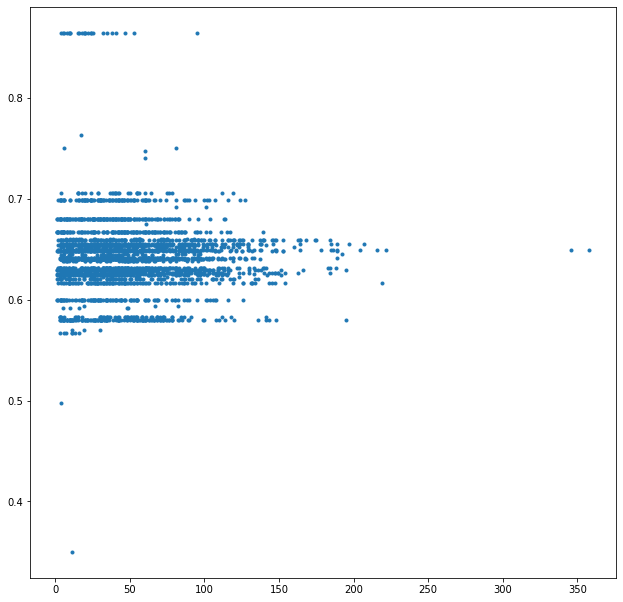

In [11]:
# Plot the results
plt.plot(df_all['NumViolations'], df_all['Laplace_Rating'], '.')
plt.xlabel('Violations'); 
plt.ylabel('StandardizedReviews');

plt.rcParams.update({'font.size': 18})
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
fig.savefig('Result.png', dpi=100)

In [12]:
# Find the correlation r
np.corrcoef(df_all['NumViolations'], df_all['Laplace_Rating'])

array([[ 1.        , -0.03052051],
       [-0.03052051,  1.        ]])